In [16]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

In [3]:
img = io.imread('/Users/benkaufman/Downloads/infographic.jpg',True)

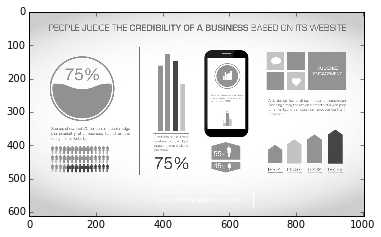

In [6]:
%matplotlib inline
io.imshow(img)

In [7]:
from skimage import exposure

In [11]:
v_min, v_max = np.percentile(img, (0.2, 99.8))

In [12]:
better_contrast = exposure.rescale_intensity(img, in_range=(v_min, v_max))

In [15]:
np.histogram(better_contrast)

(array([  5657,   3419,   9119,    668,   5855,  59753,   6903,  16230,
         93750, 413094]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

([array([ 240.,    9.,    5.,    0.,    1.,    0.,    0.,    0.,    0.,    1.]),
  array([ 256.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])],
 array([     0. ,   9975.9,  19951.8,  29927.7,  39903.6,  49879.5,
         59855.4,  69831.3,  79807.2,  89783.1,  99759. ]),
 <a list of 2 Lists of Patches objects>)

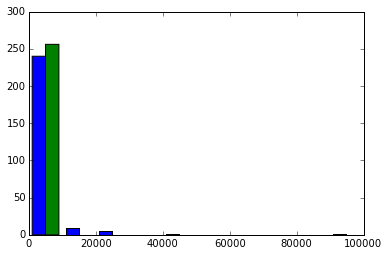

In [17]:
plt.hist(exposure.histogram(img))

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

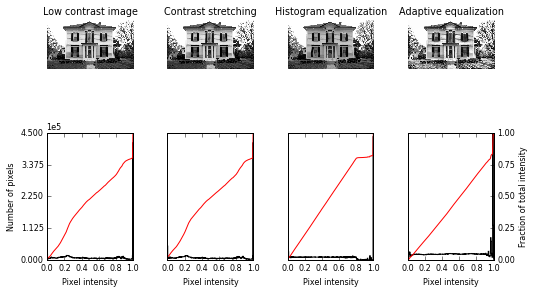

In [21]:
img = io.imread('/Users/benkaufman/Downloads/house.jpg', True)

p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
img2 